In [ ]:
import pandas as pd

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Agrupando as contas por 'cod_cliente' e contando a quantidade em cada grupo
contas_por_cliente = contas.groupby('cod_cliente').size()

# Filtrando os clientes com mais de uma conta
clientes_multiplas_contas = contas_por_cliente[contas_por_cliente > 1]

# Verificando se há algum cliente com mais de uma conta
if len(clientes_multiplas_contas) > 0:
    print("Clientes com mais de uma conta:")
    print(clientes_multiplas_contas.index)
else:
    print("Nenhum cliente possui mais de uma conta.")

Nenhum cliente possui mais de uma conta.


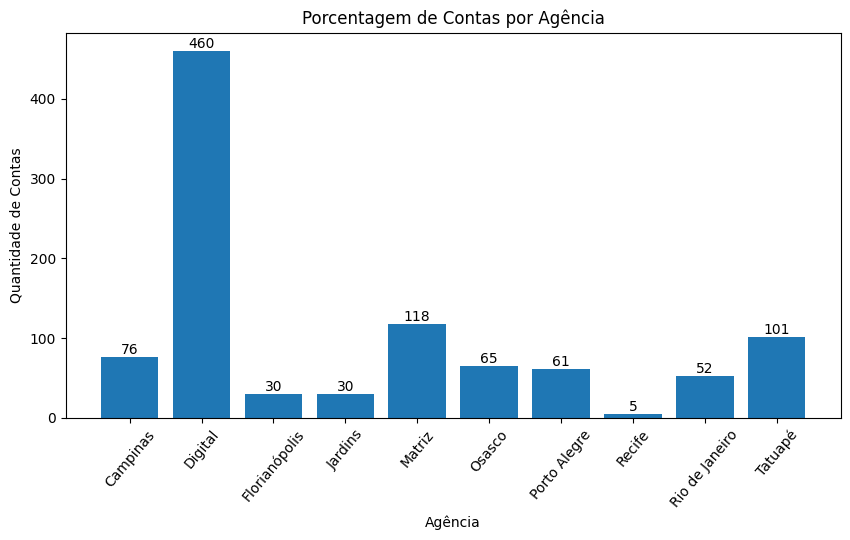

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Excluindo o registro referente ao num_conta 528
contas = contas[contas['num_conta'] != 528]

# Dicionário com os nomes das agências
nomes_agencias = {
    1: 'Matriz',
    2: 'Tatuapé',
    3: 'Campinas',
    4: 'Osasco',
    5: 'Porto Alegre',
    6: 'Rio de Janeiro',
    7: 'Digital',
    8: 'Jardins',
    9: 'Florianópolis',
    10: 'Recife'
}

# Criando uma coluna 'nome_agencia' com base no dicionário
contas['nome_agencia'] = contas['cod_agencia'].map(nomes_agencias)

# Agrupando as contas por 'nome_agencia' e contando a quantidade em cada grupo
contas_por_agencia = contas.groupby('nome_agencia').size()

# Criando um gráfico de barras com a quantidade de contas por agência
plt.figure(figsize=(10, 5))
plt.bar(contas_por_agencia.index, contas_por_agencia.values)
plt.xlabel('Agência')
plt.ylabel('Quantidade de Contas')
plt.title('Porcentagem de Contas por Agência')
plt.xticks(rotation=50)  # Rotacionando os labels do eixo x para melhor visualização

# Adicionando a quantidade de contas em cada barra
for i, v in enumerate(contas_por_agencia.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

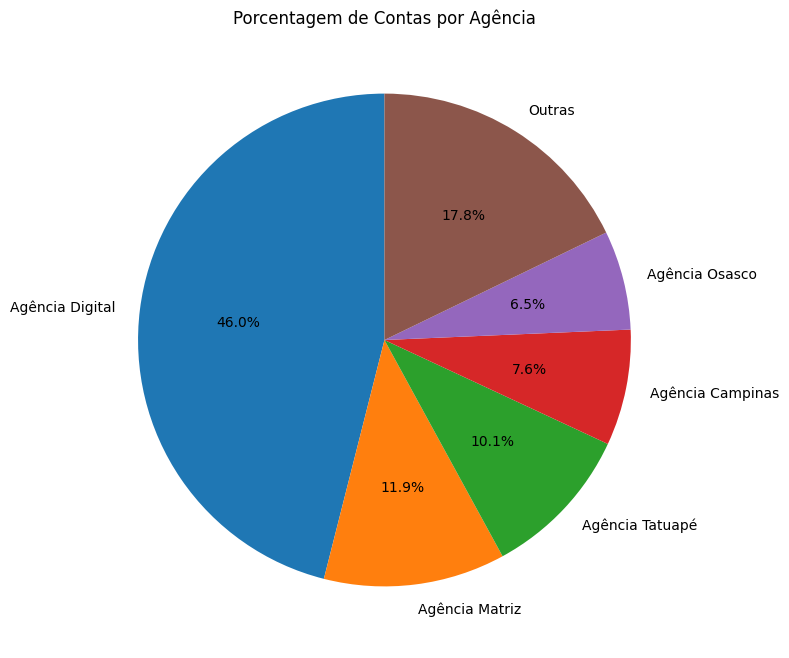

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Dicionário com os nomes das agências
nomes_agencias = {
    1: 'Agência Matriz',
    2: 'Agência Tatuapé',
    3: 'Agência Campinas',
    4: 'Agência Osasco',
    5: 'Agência Porto Alegre',
    6: 'Agência Rio de Janeiro',
    7: 'Agência Digital',
    8: 'Agência Jardins',
    9: 'Agência Florianópolis',
    10: 'Agência Recife'
}

# Criando uma coluna 'nome_agencia' com base no dicionário
contas['nome_agencia'] = contas['cod_agencia'].map(nomes_agencias)

# Agrupando as contas por 'nome_agencia' e contando a quantidade em cada grupo
contas_por_agencia = contas.groupby('nome_agencia').size()

# Obtendo as 5 agências com maior número de contas
top_5_agencias = contas_por_agencia.nlargest(5)

# Agrupando as demais agências como 'Outras'
contas_por_agencia_restantes = contas_por_agencia[~contas_por_agencia.index.isin(top_5_agencias.index)]
outras_agencias = contas_por_agencia_restantes.sum()

# Criando um gráfico de pizza com a quantidade de clientes por região
plt.figure(figsize=(8, 8))
labels = list(top_5_agencias.index) + ['Outras']
sizes = list(top_5_agencias.values) + [outras_agencias]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


plt.title('Porcentagem de Contas por Agência')
plt.show()

Medidas de Tendência Central - Saldo Total:
Média: 26543.41
Mediana: 11668.15

Medidas de Tendência Central - Saldo Disponível:
Média: 25731.19
Mediana: 11325.96

Medidas de Dispersão - Saldo Total:
1º Quartil: 938.14
2º Quartil (Mediana): 11668.15
3º Quartil: 35410.11
Desvio Padrão: 41872.10

Medidas de Dispersão - Saldo Disponível:
1º Quartil: 918.49
2º Quartil (Mediana): 11325.96
3º Quartil: 33926.21
Desvio Padrão: 40288.02


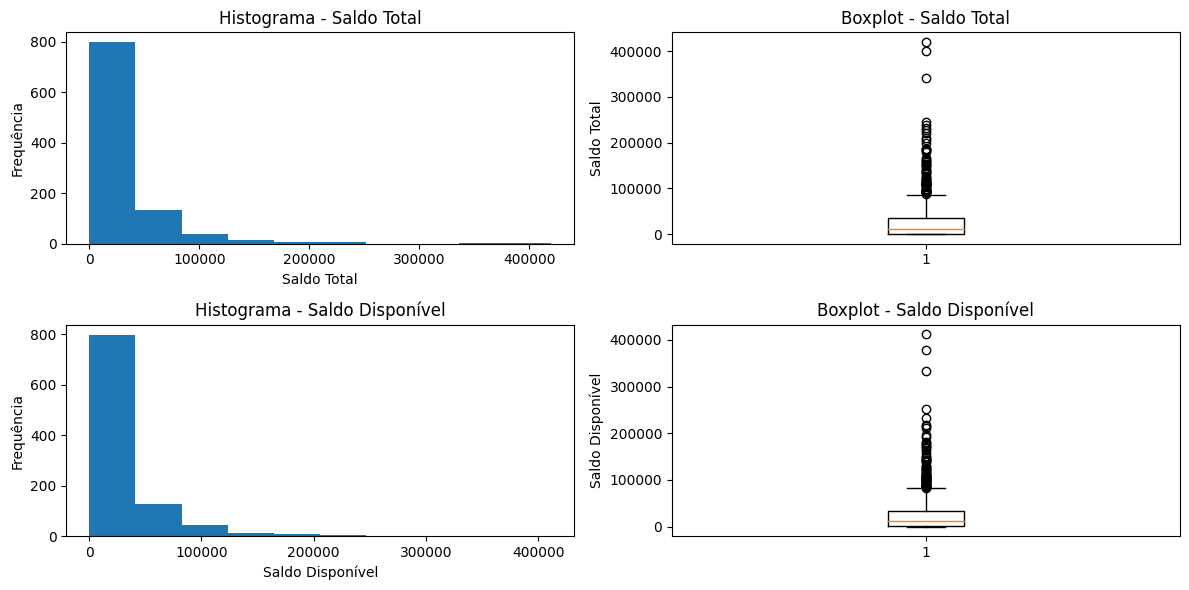

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Convertendo os campos 'saldo_total' e 'saldo_disponivel' para float
contas['saldo_total'] = contas['saldo_total'].astype(float)
contas['saldo_disponivel'] = contas['saldo_disponivel'].astype(float)

# Medidas de Tendência Central
media_saldo_total = contas['saldo_total'].mean()
#moda_saldo_total = stats.mode(contas['saldo_total'])[0,0][0,0]
mediana_saldo_total = contas['saldo_total'].median()

media_saldo_disponivel = contas['saldo_disponivel'].mean()
#moda_saldo_disponivel = stats.mode(contas['saldo_disponivel'])[0][0]
mediana_saldo_disponivel = contas['saldo_disponivel'].median()

# Medidas de Dispersão
quartis_saldo_total = np.percentile(contas['saldo_total'], [25, 50, 75])
desvio_padrao_saldo_total = contas['saldo_total'].std()

quartis_saldo_disponivel = np.percentile(contas['saldo_disponivel'], [25, 50, 75])
desvio_padrao_saldo_disponivel = contas['saldo_disponivel'].std()

# Imprimindo as medidas
print("Medidas de Tendência Central - Saldo Total:")
print(f"Média: {media_saldo_total:.2f}")
#print(f"Moda: {moda_saldo_total:.2f}")
print(f"Mediana: {mediana_saldo_total:.2f}")

print("\nMedidas de Tendência Central - Saldo Disponível:")
print(f"Média: {media_saldo_disponivel:.2f}")
#print(f"Moda: {moda_saldo_disponivel:.2f}")
print(f"Mediana: {mediana_saldo_disponivel:.2f}")

print("\nMedidas de Dispersão - Saldo Total:")
print(f"1º Quartil: {quartis_saldo_total[0]:.2f}")
print(f"2º Quartil (Mediana): {quartis_saldo_total[1]:.2f}")
print(f"3º Quartil: {quartis_saldo_total[2]:.2f}")
print(f"Desvio Padrão: {desvio_padrao_saldo_total:.2f}")

print("\nMedidas de Dispersão - Saldo Disponível:")
print(f"1º Quartil: {quartis_saldo_disponivel[0]:.2f}")
print(f"2º Quartil (Mediana): {quartis_saldo_disponivel[1]:.2f}")
print(f"3º Quartil: {quartis_saldo_disponivel[2]:.2f}")
print(f"Desvio Padrão: {desvio_padrao_saldo_disponivel:.2f}")

# Criando gráficos
plt.figure(figsize=(12, 6))

# Saldo Total
plt.subplot(2, 2, 1)
plt.hist(contas['saldo_total'], bins=10)
plt.title('Histograma - Saldo Total')
plt.xlabel('Saldo Total')
plt.ylabel('Frequência')

plt.subplot(2, 2, 2)
plt.boxplot(contas['saldo_total'])
plt.title('Boxplot - Saldo Total')
plt.ylabel('Saldo Total')

# Saldo Disponível
plt.subplot(2, 2, 3)
plt.hist(contas['saldo_disponivel'], bins=10)
plt.title('Histograma - Saldo Disponível')
plt.xlabel('Saldo Disponível')
plt.ylabel('Frequência')

plt.subplot(2, 2, 4)
plt.boxplot(contas['saldo_disponivel'])
plt.title('Boxplot - Saldo Disponível')
plt.ylabel('Saldo Disponível')

plt.tight_layout()  # Ajustando o espaçamento entre os subplots
plt.show()

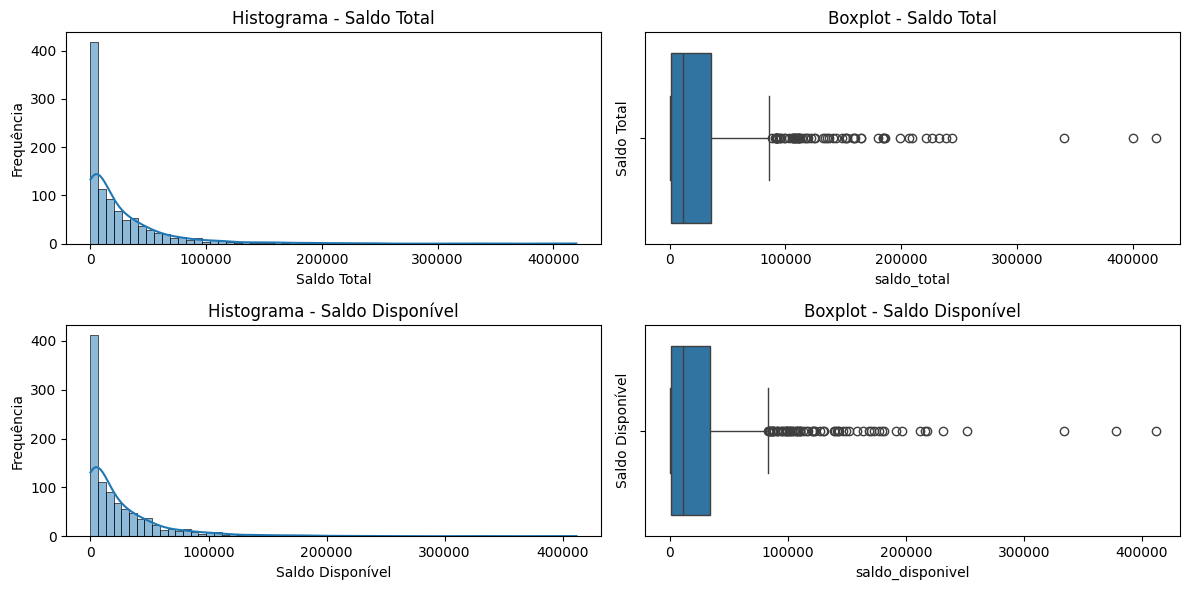

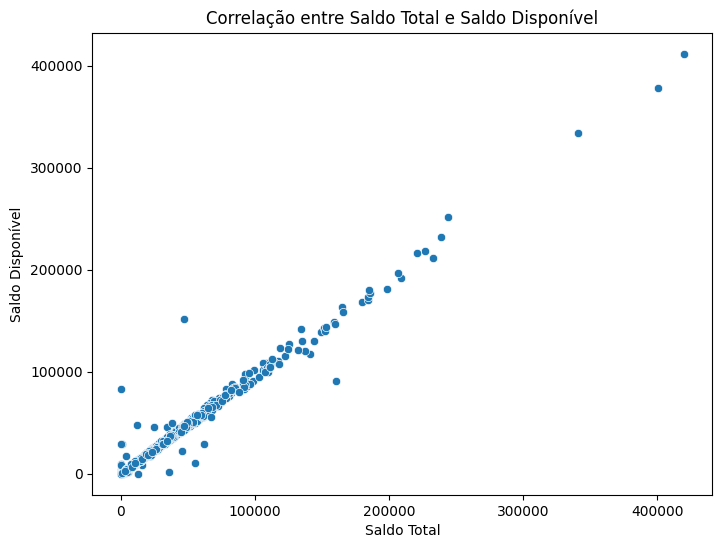

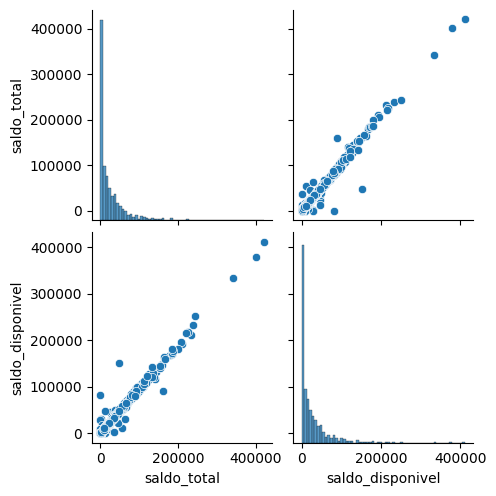

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Convertendo os campos 'saldo_total' e 'saldo_disponivel' para float
contas['saldo_total'] = contas['saldo_total'].astype(float)
contas['saldo_disponivel'] = contas['saldo_disponivel'].astype(float)

# Gráficos de Análise Exploratória
plt.figure(figsize=(12, 6))

# Saldo Total
plt.subplot(2, 2, 1)
sns.histplot(contas['saldo_total'], kde=True)
plt.title('Histograma - Saldo Total')
plt.xlabel('Saldo Total')
plt.ylabel('Frequência')

plt.subplot(2, 2, 2)
sns.boxplot(x=contas['saldo_total'])
plt.title('Boxplot - Saldo Total')
plt.ylabel('Saldo Total')

# Saldo Disponível
plt.subplot(2, 2, 3)
sns.histplot(contas['saldo_disponivel'], kde=True)
plt.title('Histograma - Saldo Disponível')
plt.xlabel('Saldo Disponível')
plt.ylabel('Frequência')

plt.subplot(2, 2, 4)
sns.boxplot(x=contas['saldo_disponivel'])
plt.title('Boxplot - Saldo Disponível')
plt.ylabel('Saldo Disponível')

plt.tight_layout()  # Ajustando o espaçamento entre os subplots
plt.show()

# Scatter Plot com correlação entre Saldo Total e Saldo Disponível
plt.figure(figsize=(8, 6))
sns.scatterplot(x=contas['saldo_total'], y=contas['saldo_disponivel'])
plt.title('Correlação entre Saldo Total e Saldo Disponível')
plt.xlabel('Saldo Total')
plt.ylabel('Saldo Disponível')
plt.show()

# Pairplot para analisar a relação entre as variáveis
sns.pairplot(contas[['saldo_total', 'saldo_disponivel']])
plt.show()

In [ ]:
import pandas as pd

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Convertendo os campos 'saldo_total' e 'saldo_disponivel' para float
contas['saldo_total'] = contas['saldo_total'].astype(float)
contas['saldo_disponivel'] = contas['saldo_disponivel'].astype(float)

# Calculando as estatísticas
min_saldo_total = contas['saldo_total'].min()
max_saldo_total = contas['saldo_total'].max()
media_saldo_total = contas['saldo_total'].mean()

min_saldo_disponivel = contas['saldo_disponivel'].min()
max_saldo_disponivel = contas['saldo_disponivel'].max()
media_saldo_disponivel = contas['saldo_disponivel'].mean()

# Imprimindo os resultados
print("Estatísticas - Saldo Total:")
print(f"Valor Mínimo: {min_saldo_total:.2f}")
print(f"Valor Máximo: {max_saldo_total:.2f}")
print(f"Média: {media_saldo_total:.2f}")

print("\nEstatísticas - Saldo Disponível:")
print(f"Valor Mínimo: {min_saldo_disponivel:.2f}")
print(f"Valor Máximo: {max_saldo_disponivel:.2f}")
print(f"Média: {media_saldo_disponivel:.2f}")

Estatísticas - Saldo Total:
Valor Mínimo: 1.22
Valor Máximo: 419923.18
Média: 26543.41

Estatísticas - Saldo Disponível:
Valor Mínimo: 0.60
Valor Máximo: 411617.06
Média: 25731.19


In [ ]:
import pandas as pd

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Convertendo os campos 'saldo_total' e 'saldo_disponivel' para float
contas['saldo_total'] = contas['saldo_total'].astype(float)
contas['saldo_disponivel'] = contas['saldo_disponivel'].astype(float)

# Calculando as estatísticas
min_saldo_total = contas['saldo_total'].min()
max_saldo_total = contas['saldo_total'].max()
media_saldo_total = contas['saldo_total'].mean()

min_saldo_disponivel = contas['saldo_disponivel'].min()
max_saldo_disponivel = contas['saldo_disponivel'].max()
media_saldo_disponivel = contas['saldo_disponivel'].mean()

# Criando DataFrames para as tabelas
tabela_saldo_total = pd.DataFrame({
    'Estatística': ['Valor Mínimo', 'Valor Máximo', 'Média'],
    'Saldo Total': [min_saldo_total, max_saldo_total, media_saldo_total]
})

tabela_saldo_disponivel = pd.DataFrame({
    'Estatística': ['Valor Mínimo', 'Valor Máximo', 'Média'],
    'Saldo Disponível': [min_saldo_disponivel, max_saldo_disponivel, media_saldo_disponivel]
})

# Imprimindo as tabelas
print("\nTabela - Saldo Total:")
print(tabela_saldo_total)

print("\nTabela - Saldo Disponível:")
print(tabela_saldo_disponivel)


Tabela - Saldo Total:
    Estatística    Saldo Total
0  Valor Mínimo       1.221000
1  Valor Máximo  419923.177800
2         Média   26543.407216

Tabela - Saldo Disponível:
    Estatística  Saldo Disponível
0  Valor Mínimo          0.600000
1  Valor Máximo     411617.060000
2         Média      25731.185586


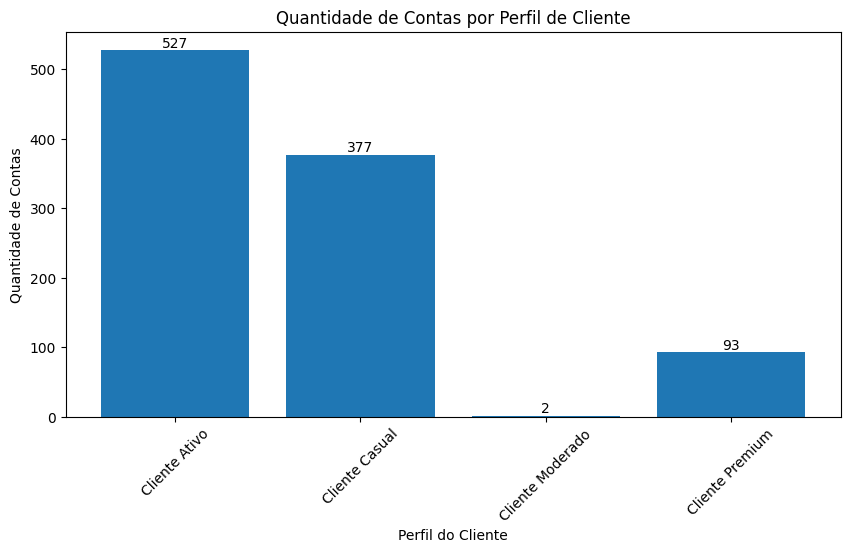

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Convertendo os campos 'saldo_total' e 'saldo_disponivel' para float
contas['saldo_total'] = contas['saldo_total'].astype(float)
contas['saldo_disponivel'] = contas['saldo_disponivel'].astype(float)

# Definindo os perfis de clientes
def define_perfil(row):
    saldo_total = row['saldo_total']
    saldo_disponivel = row['saldo_disponivel']

    if saldo_total <= 10000 and saldo_disponivel <= 5000:
        return 'Cliente Casual'
    elif saldo_total > 10000 and saldo_disponivel <= 5000:
        return 'Cliente Moderado'
    elif saldo_total > 10000 and saldo_disponivel > 5000:
        return 'Cliente Ativo'
    else:
        return 'Cliente Premium'

contas['perfil_cliente'] = contas.apply(define_perfil, axis=1)

# Agrupando as contas por perfil e contando a quantidade em cada grupo
contas_por_perfil = contas.groupby('perfil_cliente').size()

# Criando um gráfico de barras com a quantidade de contas por perfil
plt.figure(figsize=(10, 5))
plt.bar(contas_por_perfil.index, contas_por_perfil.values)
plt.xlabel('Perfil do Cliente')
plt.ylabel('Quantidade de Contas')
plt.title('Quantidade de Contas por Perfil de Cliente')
plt.xticks(rotation=45)  # Rotacionando os labels do eixo x para melhor visualização

# Adicionando a quantidade de contas em cada barra
for i, v in enumerate(contas_por_perfil.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

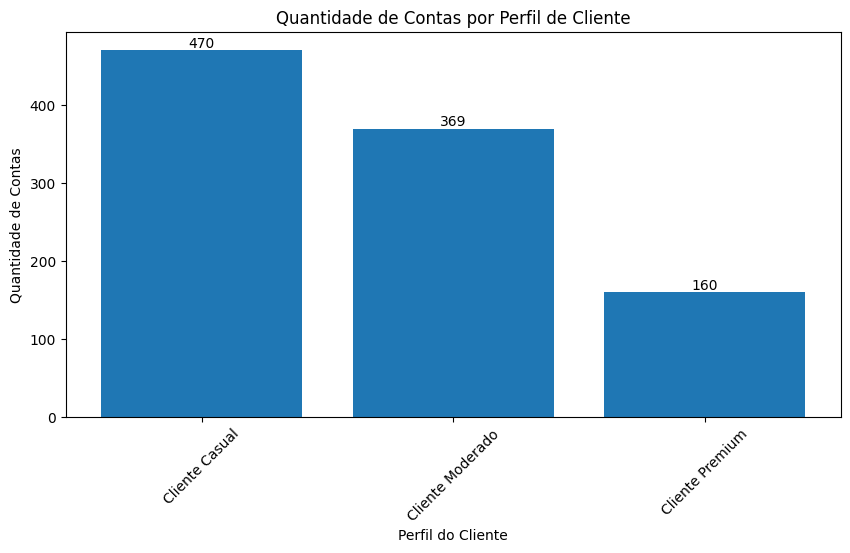

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Convertendo os campos 'saldo_total' e 'saldo_disponivel' para float
contas['saldo_total'] = contas['saldo_total'].astype(float)
contas['saldo_disponivel'] = contas['saldo_disponivel'].astype(float)

# Definindo os perfis de clientes
def define_perfil(row):
    saldo_total = row['saldo_total']
    saldo_disponivel = row['saldo_disponivel']

    if saldo_total <= 10000:
        return 'Cliente Casual'
    elif 10000 < saldo_total <= 50000:
        return 'Cliente Moderado'
    else:
        return 'Cliente Premium'

contas['perfil_cliente'] = contas.apply(define_perfil, axis=1)

# Agrupando as contas por perfil e contando a quantidade em cada grupo
contas_por_perfil = contas.groupby('perfil_cliente').size()

# Criando um gráfico de barras com a quantidade de contas por perfil
plt.figure(figsize=(10, 5))
plt.bar(contas_por_perfil.index, contas_por_perfil.values)
plt.xlabel('Perfil do Cliente')
plt.ylabel('Quantidade de Contas')
plt.title('Quantidade de Contas por Perfil de Cliente')
plt.xticks(rotation=45)  # Rotacionando os labels do eixo x para melhor visualização

# Adicionando a quantidade de contas em cada barra
for i, v in enumerate(contas_por_perfil.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [10]:
import pandas as pd

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Agrupando as contas por 'cod_colaborador' e contando a quantidade em cada grupo
contas_por_colaborador = contas.groupby('cod_colaborador').size()

# Calculando a média da quantidade de contas por colaborador
media_contas_por_colaborador = contas_por_colaborador.mean()

# Identificando o colaborador com mais contas
colaborador_mais_contas = contas_por_colaborador.idxmax()
quantidade_contas_mais = contas_por_colaborador.max()

# Identificando o colaborador com menos contas
colaborador_menos_contas = contas_por_colaborador.idxmin()
quantidade_contas_menos = contas_por_colaborador.min()

# Imprimindo os resultados
print(f"Média de contas por colaborador: {media_contas_por_colaborador:.2f}")
print(f"Colaborador com mais contas: {colaborador_mais_contas} ({quantidade_contas_mais} contas)")
print(f"Colaborador com menos contas: {colaborador_menos_contas} ({quantidade_contas_menos} contas)")

Média de contas por colaborador: 10.63
Colaborador com mais contas: 26 (84 contas)
Colaborador com menos contas: 18 (1 contas)


In [11]:
import pandas as pd

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Agrupando as contas por 'cod_colaborador' e contando a quantidade em cada grupo
contas_por_colaborador = contas.groupby('cod_colaborador').size()

# Identificando os 5 colaboradores com mais contas
top_5_colaboradores = contas_por_colaborador.nlargest(5)
print("\n5 Colaboradores com mais contas:")
print(top_5_colaboradores)

# Identificando os 5 colaboradores com menos contas
bottom_5_colaboradores = contas_por_colaborador.nsmallest(5)
print("\n5 Colaboradores com menos contas:")
print(bottom_5_colaboradores)


5 Colaboradores com mais contas:
cod_colaborador
26    84
20    69
84    67
64    62
48    61
dtype: int64

5 Colaboradores com menos contas:
cod_colaborador
18     1
44     1
74     1
95     1
100    1
dtype: int64


In [12]:
import pandas as pd

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Agrupando as contas por 'cod_colaborador' e contando a quantidade em cada grupo
contas_por_colaborador = contas.groupby('cod_colaborador').size()

# Filtrando os colaboradores com apenas uma conta
colaboradores_uma_conta = contas_por_colaborador[contas_por_colaborador == 1]

# Imprimindo os resultados
print("Colaboradores com apenas uma conta:")
print(colaboradores_uma_conta.index)

Colaboradores com apenas uma conta:
Index([18, 44, 74, 95, 100], dtype='int64', name='cod_colaborador')


In [13]:
import pandas as pd

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Agrupando as contas por 'cod_colaborador' e contando a quantidade em cada grupo
contas_por_colaborador = contas.groupby('cod_colaborador').size()

# Média de contas por colaborador
media_contas_por_colaborador = 11  # Considerando a média fornecida

# Contando colaboradores acima da média
colaboradores_acima_media = contas_por_colaborador[contas_por_colaborador > media_contas_por_colaborador].count()

# Contando colaboradores na média
colaboradores_na_media = contas_por_colaborador[contas_por_colaborador == media_contas_por_colaborador].count()

# Contando colaboradores abaixo da média
colaboradores_abaixo_media = contas_por_colaborador[contas_por_colaborador < media_contas_por_colaborador].count()

# Imprimindo os resultados
print(f"Colaboradores acima da média: {colaboradores_acima_media}")
print(f"Colaboradores na média: {colaboradores_na_media}")
print(f"Colaboradores abaixo da média: {colaboradores_abaixo_media}")

Colaboradores acima da média: 12
Colaboradores na média: 3
Colaboradores abaixo da média: 79


In [14]:
import pandas as pd

# Carregando o arquivo contas.csv
contas = pd.read_csv('contas.csv')

# Criando um conjunto com os códigos de colaboradores presentes no arquivo
colaboradores_com_contas = set(contas['cod_colaborador'])

# Criando um conjunto com todos os códigos de colaboradores (de 1 a 100)
todos_colaboradores = set(range(1, 101))

# Encontrando os colaboradores que não possuem contas
colaboradores_sem_contas = todos_colaboradores - colaboradores_com_contas

# Verificando se há colaboradores sem contas
if colaboradores_sem_contas:
    print("Colaboradores sem contas:")
    print(colaboradores_sem_contas)
else:
    print("Todos os colaboradores possuem contas.")

Colaboradores sem contas:
{99, 6, 71, 82, 19, 89}
